<h1>Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Importing the dataset and seeing the surface</h2>
In dataset, samples are ordered by first feature; shuffling them to discard any undesired outcome that might arise while developing the model

In [2]:
data = pd.read_csv('test_scores.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,KZKKE,Rural,Public,QTU,Standard,23.0,TF7O6,Male,Qualifies for reduced/free lunch,34.0,41.0
1,DNQDD,Suburban,Public,ROP,Experimental,28.0,KCJ9W,Female,Does not qualify,60.0,78.0
2,UAGPU,Suburban,Public,NWZ,Standard,21.0,ATEDY,Male,Does not qualify,57.0,66.0
3,IDGFP,Urban,Non-public,P2A,Experimental,17.0,9JGL2,Female,Does not qualify,84.0,99.0
4,LAYPA,Rural,Public,J8J,Standard,19.0,24PRY,Male,Does not qualify,62.0,71.0


Let's explore the features and examine some aspects of the categories that are notable

In [3]:
data.school_setting.unique()

array(['Rural', 'Suburban', 'Urban'], dtype=object)

In [4]:
data.school_type.unique()

array(['Public', 'Non-public'], dtype=object)

In [5]:
data.teaching_method.unique()

array(['Standard', 'Experimental'], dtype=object)

In [6]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data.lunch.unique()

array(['Qualifies for reduced/free lunch', 'Does not qualify'],
      dtype=object)

<h3>gender</h3>

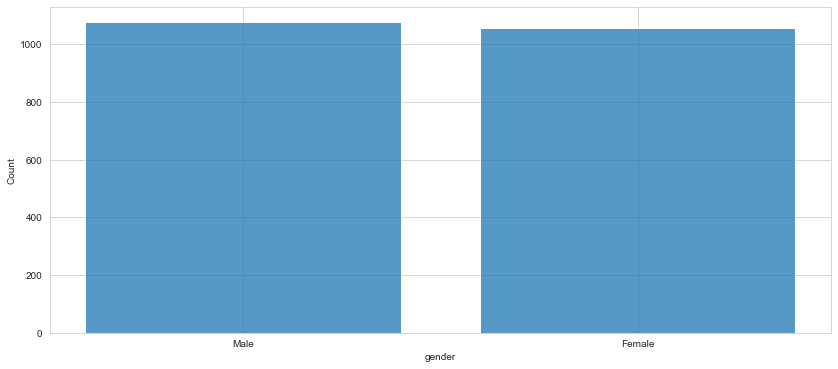

In [8]:
sns.set_style('whitegrid')
plt.subplots(figsize=(14, 6))
sns.histplot(data, x="gender", shrink=0.8)

<h3>school</h3>

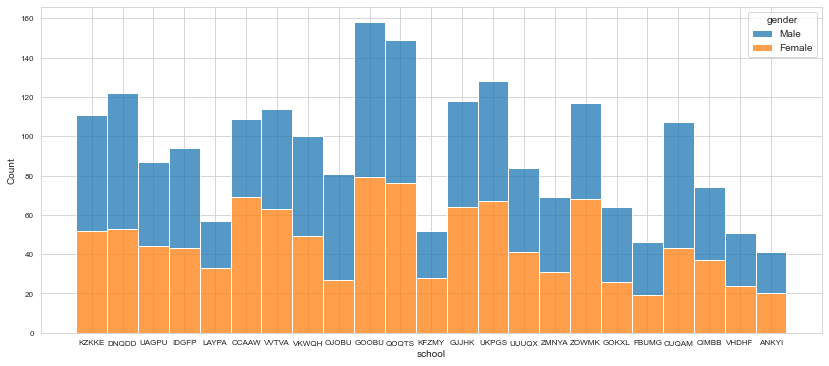

In [9]:
plt.subplots(figsize=(14, 6))
sns.histplot(data, x='school', hue="gender", multiple="stack").tick_params(labelsize=8.1)

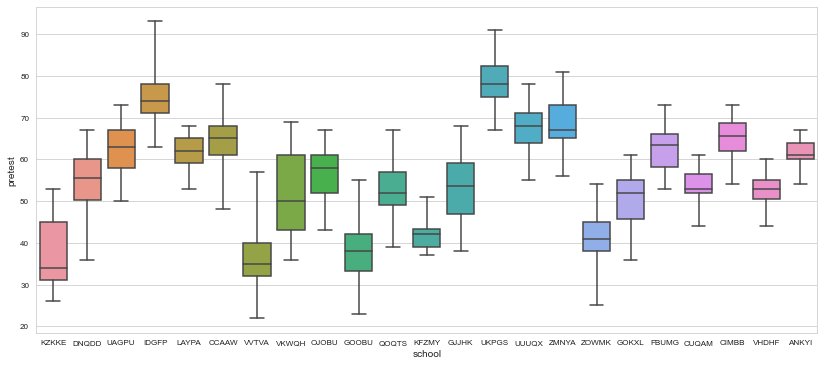

In [10]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data, x="school", y="pretest", whis=np.inf).tick_params(labelsize=8.1)

<h3>school_setting</h3>

([<matplotlib.patches.Wedge at 0x1e722547c10>,
 [Text(0.2576168712005097, 1.0694080360988785, 'Urban'),
  Text(-0.918145305049163, -0.6058128414091101, 'Suburban'),
  Text(0.803991674335455, -0.7507312352628415, 'Rural')],
 [Text(0.14051829338209618, 0.5833134742357519, '42.5%'),
  Text(-0.5008065300268161, -0.33044336804133273, '33.6%'),
  Text(0.4385409132738845, -0.4094897646888226, '23.9%')])

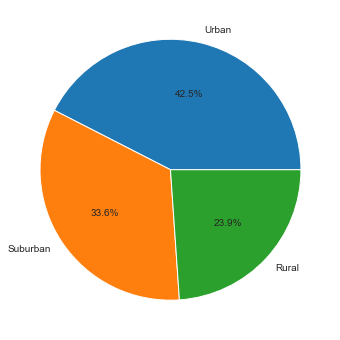

In [11]:
plt.subplots(figsize=(14,6))
plt.pie(data.school_setting.value_counts(), labels=data.school_setting.value_counts().index, autopct='%1.1f%%')

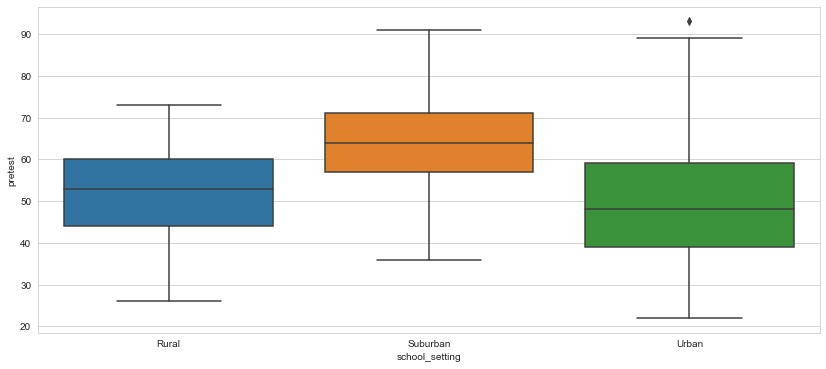

In [12]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data,x="school_setting",y="pretest")

<h3>teaching_method</h3>

Is teaching_method same for every classroom of a school or every classroom has different teaching_method?

In [13]:
data.teaching_method[data.school == 'UUUQX'].value_counts()

Standard        51
Experimental    33
Name: teaching_method, dtype: int64

In [14]:
for classroom in data.classroom.value_counts().index.to_list():
    if len(data.teaching_method[data.classroom == classroom].value_counts().index.to_list()) != 1:
        print('error')

Last prompt printed nothing, so teaching_method changes over classrooms

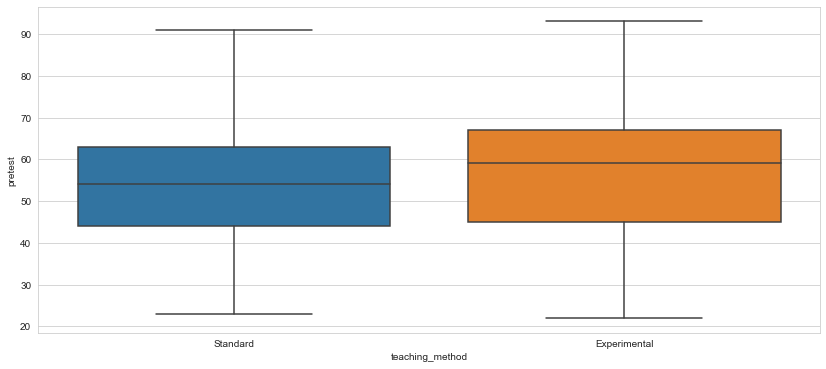

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data,x="teaching_method",y="pretest")

<h3>school_type</h3>

([<matplotlib.patches.Wedge at 0x1e722784af0>,
 [Text(-0.7572194867914466, 0.7978838567255879, 'Public'),
  Text(0.7572195614947216, -0.7978837858295792, 'Non-public')],
 [Text(-0.4130288109771526, 0.43520937639577517, '74.2%'),
  Text(0.4130288517243935, -0.435209337725225, '25.8%')])

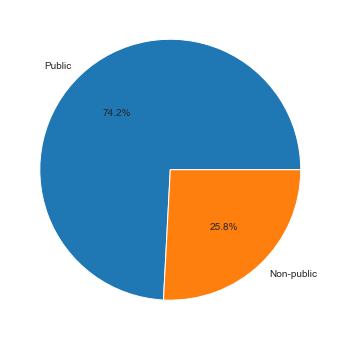

In [16]:
plt.subplots(figsize=(14,6))
plt.pie(data.school_type.value_counts(), labels=data.school_type.value_counts().index, autopct='%1.1f%%')

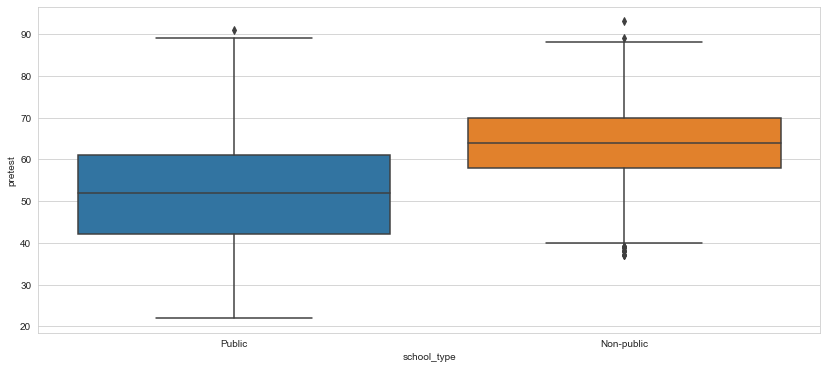

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data,x="school_type",y="pretest")

<h3>pretest</h3>

In [18]:
data.pretest.describe()

count    2133.000000
mean       54.955931
std        13.563101
min        22.000000
25%        44.000000
50%        56.000000
75%        65.000000
max        93.000000
Name: pretest, dtype: float64

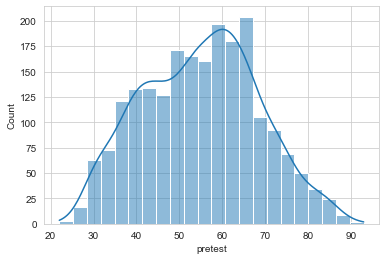

In [19]:
sns.histplot(x=data.pretest, kde=True)

<h3>posttest</h3>

In [20]:
data.posttest.describe()

count    2133.000000
mean       67.102203
std        13.986789
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: posttest, dtype: float64

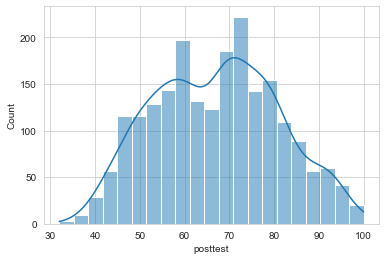

In [21]:
sns.histplot(x=data.posttest, kde=True)

Descriptive statistics of numeric data and correlation

In [22]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [23]:
correlation = data.corr()
correlation

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


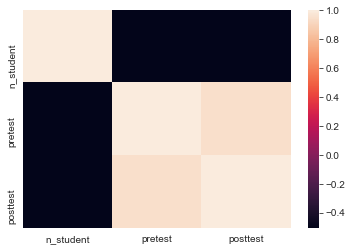

In [24]:
sns.heatmap(correlation)

<h1>Preprocessing</h1>

As student_id is unique for every sample, it has no contribution for estimation

In [25]:
data.drop(['student_id'], axis=1, inplace=True)

Encoding categorical data, then one-hot-encoding and finally extracting data matrix and target vector

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
featuresToEncode = ['classroom', 'lunch', 'gender', 'teaching_method', 'school_type', 'school_setting', 'school']
for feature in featuresToEncode:
    data[feature] = le.fit_transform(data[feature])

In [27]:
data_dummies = pd.get_dummies(data, columns=['classroom', 'lunch', 'gender', 'teaching_method', 'school_type',
                              'school_setting', 'school'])

In [28]:
X = data_dummies.loc[:, 'n_student':'school_22'].values
y = data_dummies.posttest.values
X, y

(array([[23., 34., 41., ...,  0.,  0.,  0.],
        [28., 60., 78., ...,  0.,  0.,  0.],
        [21., 57., 66., ...,  0.,  0.,  0.],
        ...,
        [19., 58., 75., ...,  0.,  0.,  0.],
        [25., 86., 95., ...,  0.,  0.,  0.],
        [21., 40., 53., ...,  0.,  0.,  0.]]),
 array([41., 78., 66., ..., 75., 95., 53.]))

<h1>Building Model</h1>

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Let's use OLS as baseline model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression().fit(X_train, y_train)
lr_predtrain = lr.predict(X_train)
lr_predtest = lr.predict(X_test)
r2_score(lr_predtrain, y_train), r2_score(lr_predtest, y_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,y)
scores

array([1., 1., 1., 1., 1.])

In [31]:
lr.predict(X), y

(array([41., 78., 66., ..., 75., 95., 53.]),
 array([41., 78., 66., ..., 75., 95., 53.]))

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr.predict(X),y)

1.9524991601442104e-28

We have an amazing model, resulting in very small offsets.

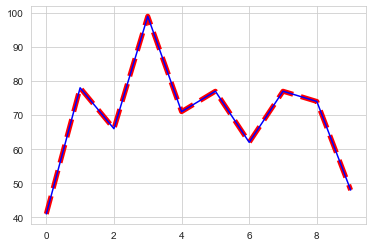

In [33]:
plt.plot(np.arange(10),lr.predict(X)[:10], '--', color='red', lw=5)
plt.plot(np.arange(10),y[:10],'-', color='blue')